In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.preprocessing import normalize
from scipy.sparse import csr_matrix, vstack
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

import transformers as ppb # pytorch-pretrained-bert
import torch

import pipeline as pp
import stats_hc as st
import models as ml

import importlib
import math

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\henri\miniconda3\envs\fake-news-env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
importlib.reload(pp)
importlib.reload(st)
stopwords_lst = stopwords.words('english')

WordFreq = st.Word_frequency(labels=['fake', 'reliable'])
Count_items = st.Count_items()
Contribution = st.Contribution()

pp.apply_pipeline(
    "../datasets/sample/dataset.csv", 
    [   (pp.Binary_labels(), 'type', 'binary_label'),
        (pp.Clean_data(), 'content'),
        (pp.Tokenizer(), 'content'),
        (pp.Remove_stopwords(stopwords_lst), 'content'),
        (pp.Stem(), 'content'),
        (WordFreq, None),
        (Count_items, 'content'),
        (Contribution, None),
    ],
    progress_bar=True
)


  0%|          | 0/100 [00:00<?, ?it/s]c:\projects\FakeNews\FakeNews\src\stats_hc.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data.append(row, ignore_index=True)
100%|██████████| 100/100 [00:00<00:00, 244.34it/s]

finish time: 2.780988931655884


In [14]:
#WordFreq.plot_frequency(label=None)

In [16]:
#WordFreq.plot_fake_real(labels=('fake', 'reliable'))

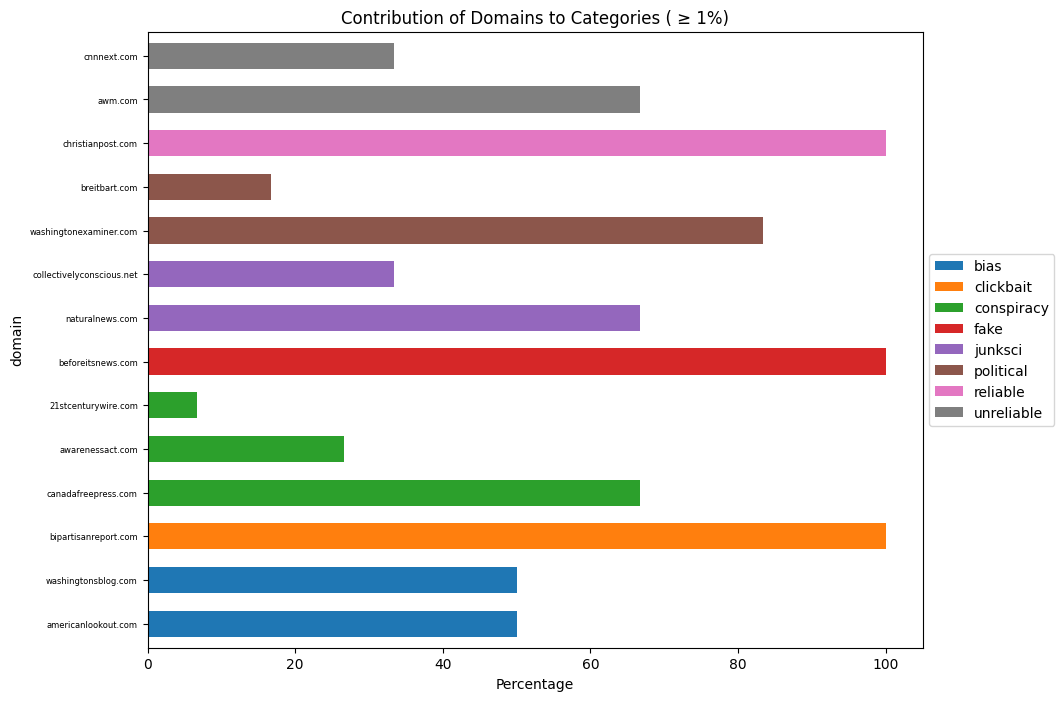

In [25]:
Contribution.contributionPlot(threshold=2)